### 딥-러닝 과정 CNN 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
 %config Completer.use_jedi = False

In [2]:
# 1. 데이터 불러오기

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


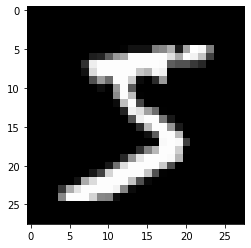

In [3]:
# 2. 이미지 데이터 확인하기 🖼

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.gray)


In [4]:
import numpy as np

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟

X_train_re = X_train.reshape(60000, 28, 28, 1)
X_test_re = X_test.reshape(10000,28, 28, 1)
y_train_re = X_train.reshape(60000, 28, 28, 1)
y_test_re = X_test.reshape(10000,28, 28, 1)

print(X_train_re.shape)
print(X_test_re.shape)
print(y_train_re.shape)
print(y_test_re.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
print(X_train_re[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [7]:
# 3-2. 이미지 데이터 전처리 : Normalzation 

X_train_scaled = X_train_re/255
X_test_scaled = X_test_re/255

print(X_train_scaled[0])


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [8]:
# 4. Label 전처리 (one-hot encoding) 
from keras.utils import to_categorical

y_train_encode = to_categorical(y_train) 
y_test_encode = to_categorical(y_test)

print(y_train_encode[0])
print(y_test_encode[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

model = keras.Sequential()

In [10]:
# 5. 모델 생성 : CNN 🌟🌟🌟

model.add(Conv2D(filters= 32,
                kernel_size=(3,3),
                padding='same',
                activation='relu',
                input_shape=(28,28,1)))

model.add(Conv2D(64,(3,3),
                padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,625,866
Trainable params: 1,625,866
Non-trainable params: 0
______________________________________________

In [11]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# 7. 모델 학습시키기

history = model.fit(X_train_scaled, y_train_encode,
                   batch_size = 128,
                   epochs = 20,
                   validation_split = 0.2,
                   verbose=1)

Epoch 1/20
375/375 [==============================] - 6s 17ms/step - loss: 0.1833 - accuracy: 0.9458 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0543 - val_accuracy: 0.9846
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0524 - val_accuracy: 0.9849
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0397 - val_accuracy: 0.9884
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0532 - val_accuracy: 0.9856
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0479 - val_accuracy: 0.9883

In [13]:
# 8. 모델 평가하기
acc_train = model.evaluate(X_train_scaled, y_train_encode)
acc_test = model.evaluate(X_test_scaled, y_test_encode)

print(acc_train)
print(acc_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9892
[0.015802865847945213, 0.9967666864395142]
[0.052143510431051254, 0.9891999959945679]


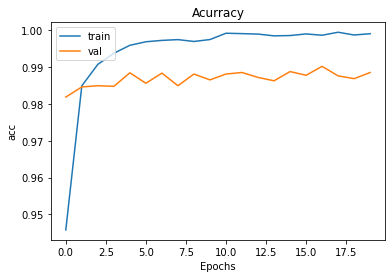

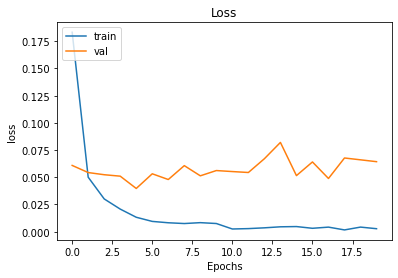

In [14]:
# 9. 학습 시각화하기
import matplotlib.pyplot as plt

# acc

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Acurracy")
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend(['train','val'], loc='upper left')
plt.show()

# loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')
plt.show()

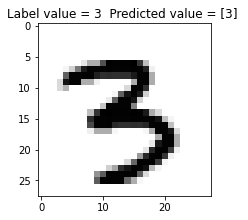

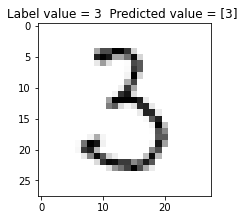

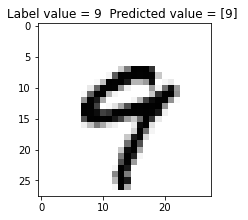

In [15]:
# 10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 28, 28, 1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()


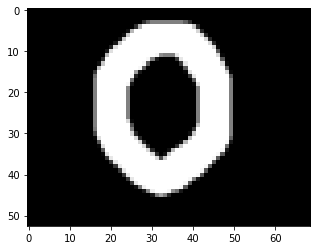

In [62]:
# 직접 쓴 숫자 이미지 테스트 

import cv2

image_0 = cv2.imread('number4.png',
                    cv2.IMREAD_GRAYSCALE)

plt.imshow(image_0, cmap=plt.cm.gray)

In [63]:
print(image_0.shape)

(53, 69)


(28, 28)


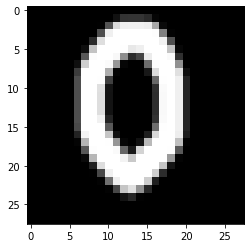

In [64]:
# image resize

image_0_resize = cv2.resize(image_0, dsize=(28,28),
                           interpolation=cv2.INTER_AREA)

plt.imshow(image_0_resize, cmap = plt.cm.gray)
print(image_0_resize.shape)

(28, 28, 1)


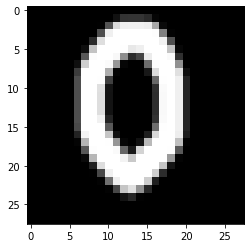

In [65]:
image_0_re = image_0_resize.reshape(28, 28, 1)

print(image_0_re.shape)
plt.imshow(image_0_re, cmap = plt.cm.gray)

In [66]:
# model predict 

result_0 = model.predict(image_0_re.reshape(1,28,28,1))

print(result_0)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
